## Diagrama de valores en la ESS

### Paquetes

In [ ]:
!pip install pyreadstat

In [3]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import pyreadstat
import numpy as np
import statistics as st
from statistics import mode

### Datos

In [15]:
df, meta = pyreadstat.read_sav("Documents/MEGA/Manu/UPO/Curso 5º-2/Pol/ESS9.sav")
# este paquete es mejor que pandas solo

In [16]:
df.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,ZNONCONVENTIONAL,ZEstr_Oport,ZSelf_Oport,ZIncome_rec,Zagea,Zeduyrs,PRE_6,PRE_7,ZPRE_6,ZPRE_7
0,ESS9e03_1,9.0,3.1,17.02.2021,112061.0,DK,30.0,5.0,30.0,7.0,...,-0.693482,-0.253449,-0.173913,NaN,1.607585,NaN,NaN,NaN,NaN,NaN
1,ESS9e03_1,9.0,3.1,17.02.2021,112183.0,DK,10.0,5.0,150.0,7.0,...,0.047189,0.941977,0.351911,NaN,-1.756717,NaN,NaN,NaN,NaN,NaN
2,ESS9e03_1,9.0,3.1,17.02.2021,17152.0,EE,90.0,5.0,60.0,5.0,...,1.528530,-1.448876,0.877735,-0.529169,1.187047,-0.465263,NaN,NaN,NaN,NaN
3,ESS9e03_1,9.0,3.1,17.02.2021,59415.0,ES,10.0,5.0,20.0,2.0,...,-0.693482,-1.448876,-1.225560,NaN,-0.284835,NaN,NaN,NaN,NaN,NaN
4,ESS9e03_1,9.0,3.1,17.02.2021,26499.0,FI,60.0,5.0,150.0,6.0,...,2.269201,0.344264,0.877735,-0.886237,-1.493881,-0.232676,NaN,NaN,NaN,NaN


In [5]:
df["cntry"].unique()

array(['DK', 'EE', 'ES', 'FI', 'FR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LV',
       'ME', 'NO', 'SE', 'SI', 'SK', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ',
       'DE', 'GB', 'HR', 'NL', 'PL', 'PT', 'RS'], dtype=object)

## 1. Alemania

In [6]:
# Alemania y España
df_1 = df[df["cntry"] == "DE"].copy() 
# Vemos algunas filas
df_1.iloc[:, 580:600] 

,LEFT,RIG,EXRIG,FAC1_1,FAC2_1,FAC3_1,FAC4_1,FAC1_2,EDLEVR,PSOE,PP,VOX,UP,CS,FAC1_3,FAC2_3,class8,PRE_1,PRE_2,PRE_3
3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.665315,0.833631,0.886953
3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.580860,0.818692,0.828321
3712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.640397,0.704884,0.842507
3713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.582055,0.791715,0.926678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.740297,0.707875,0.906273
24733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.665315,0.833631,0.886953
24734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.665315,0.833631,0.886953
24735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.582055,0.791715,0.926678


In [7]:
# Ingresos
df_1["hinctnta"].describe()

count    2088.000000
mean        6.072318
std         2.813657
min         1.000000
25%         4.000000
50%         6.000000
75%         8.250000
max        10.000000
Name: hinctnta, dtype: float64

In [8]:
df_1["domicil"].describe()

count    2358.000000
mean        2.884648
std         1.080671
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: domicil, dtype: float64

In [9]:
# seleccionamos las filas
df_1 = df_1[["prtvede1", "domicil", "cntry", "hinctnta", "imwbcnt", "gincdif"]]
# Sustituimos NA
df_1["prtvede1"] = df_1["prtvede1"].fillna("No procede")

# en este tenemos que calcular la moda
df_1["domicil"] = df_1["domicil"].fillna(mode(df_1["domicil"]))

# Aquí sencillamente ponemos la mediana utilizando numpy
df_1["hinctnta"] = df_1["hinctnta"].fillna(np.nanmedian(df_1["hinctnta"]))

df_1["imwbcnt"] = df_1["imwbcnt"].fillna(np.nanmedian(df_1["imwbcnt"]))

df_1["gincdif"] = df_1["gincdif"].fillna(np.nanmedian(df_1["gincdif"]))


df_1.head()

,prtvede1,domicil,cntry,hinctnta,imwbcnt,gincdif
3710,No procede,2.0,DE,3.0,5.0,2.0
3711,1.0,2.0,DE,6.0,5.0,1.0
3712,9.0,2.0,DE,8.0,8.0,3.0
3713,2.0,2.0,DE,6.0,7.0,1.0
3714,2.0,1.0,DE,5.0,8.0,1.0


In [10]:
df_1["domicil"] = df["domicil"].astype(str)
df_1["domicil"].unique()

array(['2.0', '1.0', '3.0', '4.0', '5.0'], dtype=object)

In [11]:
# Diccionario para la variable de lugar. Basados en la WVS, aproximación
townmap = {
    "1.0":750000,
    "2.0": 250000,
    "3.0":60000,
    "4.0":12500,
   "5.0":2500,
}
df_1["urbanismo"] = df_1["domicil"].apply(lambda x: townmap[x])
df_1["urbanismo"].unique()

array([250000, 750000,  60000,  12500,   2500], dtype=int64)

In [12]:
df_1["prtvede1"].unique()

array(['No procede', 1.0, 9.0, 2.0, 3.0, 5.0, 4.0, 7.0, 6.0, 8.0],
      dtype=object)

In [13]:
# Diccionario para la variable de partido. 
partymap = {
    1.0:"CDU",
    2.0: "SPD",
    3.0:"Die Linke",
    4.0:"Grünen",
    5.0:"FDP",
    6.0:"AfD",
    7.0:"No procede",
    8.0:"No procede",
    9.0:"No procede",
    "No procede":"No procede"
}
df_1["party"] = df_1["prtvede1"].apply(lambda x: partymap[x])
df_1["party"].unique()

array(['No procede', 'CDU', 'SPD', 'Die Linke', 'FDP', 'Grünen', 'AfD'],
      dtype=object)

In [14]:
df_1["gincdif"] = (df_1["gincdif"]-6)*-1
df_1["gincdif"].unique()

array([4., 5., 3., 1., 2.])

In [15]:
means = df_1[df_1["party"] != "No procede"].groupby("party").mean()
means

,hinctnta,imwbcnt,gincdif,urbanismo
party,,,,
AfD,5.552083,2.541667,3.812500,143697.916667
CDU,6.569307,5.242574,3.640264,137842.409241
Die Linke,5.616822,6.009346,4.355140,280093.457944
FDP,6.680412,5.123711,3.494845,186958.762887
Grünen,6.901345,6.600897,4.017937,221491.031390
SPD,6.125000,5.615000,4.035000,155775.000000


<AxesSubplot:xlabel='Población', ylabel='Ingresos [Escala 1-10]'>

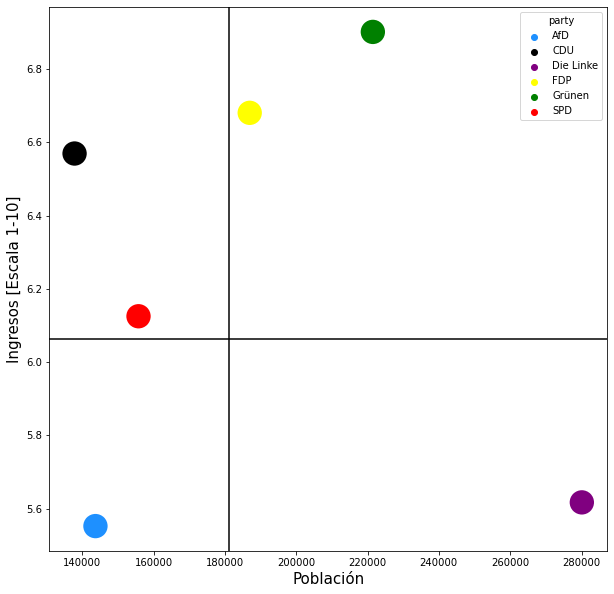

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.axhline(y=df_1["hinctnta"].mean(), color = "black")
plt.axvline(x=df_1["urbanismo"].mean(), color = "black")
plt.xlabel("Población", fontsize=15)
plt.ylabel("Ingresos [Escala 1-10]", fontsize=15)
sns.scatterplot(data=means, x="urbanismo", y="hinctnta", hue="party", s=700, 
                palette=["dodgerblue", "black", "purple", "yellow", "green", "red"])

<AxesSubplot:xlabel='Redistribución [Escala 1-5]', ylabel='Inmigración [Escala 0-10]'>

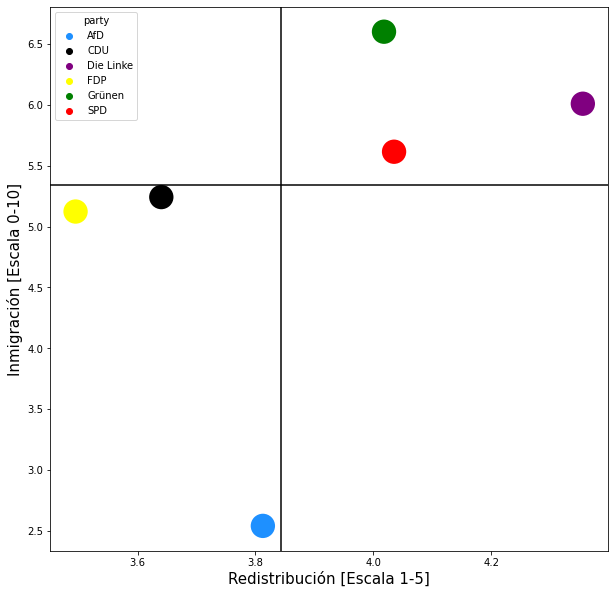

In [17]:
plt.figure(figsize=(10, 10))
plt.axhline(y=df_1["imwbcnt"].mean(), color = "black")
plt.axvline(x=df_1["gincdif"].mean(), color = "black")
plt.xlabel("Redistribución [Escala 1-5]", fontsize=15)
plt.ylabel("Inmigración [Escala 0-10]", fontsize=15)
sns.scatterplot(data=means, x="gincdif", y="imwbcnt", hue="party", s=700, 
                palette=["dodgerblue", "black", "purple", "yellow", "green", "red"])

<Figure size 1440x1080 with 0 Axes>

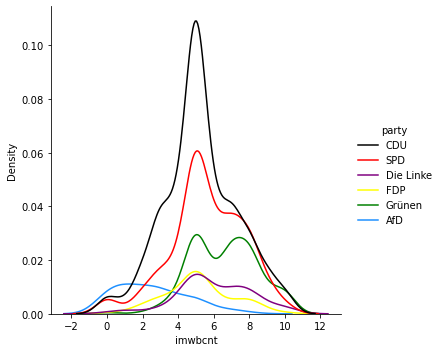

In [39]:
# Probamos a ver distribuciones
plt.figure(figsize=(20,15))
sns.displot(data=df_1[df_1["party"] != "No procede"], x="imwbcnt", hue="party", kind="kde", 
            palette=["black", "red", "purple", "yellow", "green", "dodgerblue"])

## 2. España

In [71]:
# España
df_1 = df.loc[df["cntry"] == "ES"]
# Vemos algunas filas
df_1.columns

Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'nwspol',
       'netusoft', 'netustm', 'ppltrst',
       ...
       'ZNONCONVENTIONAL', 'ZEstr_Oport', 'ZSelf_Oport', 'ZIncome_rec',
       'Zagea', 'Zeduyrs', 'PRE_6', 'PRE_7', 'ZPRE_6', 'ZPRE_7'],
      dtype='object', length=627)

In [72]:
# Ingresos
df_1["hinctnta"].describe()

count    1205.000000
mean        5.121162
std         2.539114
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: hinctnta, dtype: float64

In [73]:
df_1["domicil"].describe()

count    1667.000000
mean        3.034793
std         1.153829
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: domicil, dtype: float64

In [74]:
moda = df_1['domicil'].mode()
moda

0    4.0
Name: domicil, dtype: float64

In [75]:
# seleccionamos las filas
df_1 = df_1[["prtvtees", "domicil", "cntry", "hinctnta", "imwbcnt", "gincdif"]]

# en este tenemos que calcular la moda
moda = df_1['domicil'].mode()
df_1['domicil'].fillna(4.0, inplace=True)

# Aquí sencillamente ponemos la mediana utilizando numpy
df_1["hinctnta"] = df_1["hinctnta"].fillna(np.nanmedian(df_1["hinctnta"]))

df_1["imwbcnt"] = df_1["imwbcnt"].fillna(np.nanmedian(df_1["imwbcnt"]))

df_1["gincdif"] = df_1["gincdif"].fillna(np.nanmedian(df_1["gincdif"]))


df_1.head()

,prtvtees,domicil,cntry,hinctnta,imwbcnt,gincdif
3,NaN,4.0,ES,5.0,3.0,2.0
5840,NaN,1.0,ES,5.0,9.0,2.0
5841,2.0,1.0,ES,2.0,8.0,1.0
5842,NaN,1.0,ES,5.0,10.0,1.0
5843,NaN,2.0,ES,4.0,7.0,2.0


In [76]:
townmap = {
    1.0:750000,
    2.0: 250000,
    3.0:60000,
    4.0:12500,
   5.0:2500,
}
df_1["urbanismo"] = df_1["domicil"].apply(lambda x: townmap[x])
df_1["urbanismo"].unique()

array([ 12500, 750000, 250000,  60000,   2500], dtype=int64)

In [83]:
print(df_1["prtvtees"].isna().sum(),
      df_1["prtvtees"].value_counts())

685 2.0     313
1.0     187
3.0     129
16.0    104
5.0      68
10.0     47
13.0     15
54.0     15
8.0      15
11.0     13
14.0     12
55.0     12
18.0     11
53.0      9
9.0       7
7.0       7
19.0      6
15.0      4
17.0      4
12.0      3
20.0      2
Name: prtvtees, dtype: int64


In [79]:
def my_recodeclass(a):
    if a == 1.0:
        return "PP"
    if a == 2.0:
        return "PSOE"
    if (a>2 and a<5) or (a>5.0 and a<8.0):
        return "UP"
    if a == 5.0:
        return "CS"
    if a == 16.0:
        return "VOX"
    else:
        return "No procede"
    
df_1["party"] = df_1["prtvtees"].apply(my_recodeclass)
df_1["party"].value_counts()

No procede    860
PSOE          313
PP            187
UP            136
VOX           104
CS             68
Name: party, dtype: int64

In [84]:
df_1["gincdif"] = (df_1["gincdif"]-6)*-1
df_1["gincdif"].unique()

array([4., 5., 1., 3., 2.])

In [87]:
df_1.drop(["prtvtees"],axis=1, inplace=True)
means = df_1[df_1["party"] != "No procede"].groupby("party").mean()
means

,domicil,hinctnta,imwbcnt,gincdif,urbanismo
party,,,,,
CS,2.823529,5.676471,5.529412,3.720588,197352.941176
PP,3.026738,4.962567,5.032086,3.737968,192018.716578
PSOE,3.038339,4.948882,5.805112,4.143770,186797.124601
UP,2.830882,5.455882,6.742647,4.382353,220110.294118
VOX,3.269231,5.432692,3.865385,3.769231,121177.884615


<AxesSubplot:xlabel='Población', ylabel='Ingresos [Escala 1-10]'>

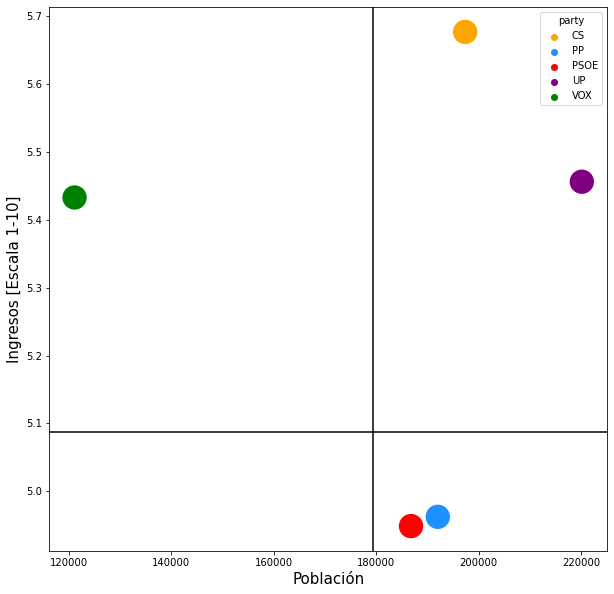

In [89]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.axhline(y=df_1["hinctnta"].mean(), color = "black")
plt.axvline(x=df_1["urbanismo"].mean(), color = "black")
plt.xlabel("Población", fontsize=15)
plt.ylabel("Ingresos [Escala 1-10]", fontsize=15)
sns.scatterplot(data=means, x="urbanismo", y="hinctnta", hue="party", s=700, 
                palette=["orange", "dodgerblue", "red", "purple", "green"])

<AxesSubplot:xlabel='Redistribución [Escala 1-5]', ylabel='Inmigración [Escala 0-10]'>

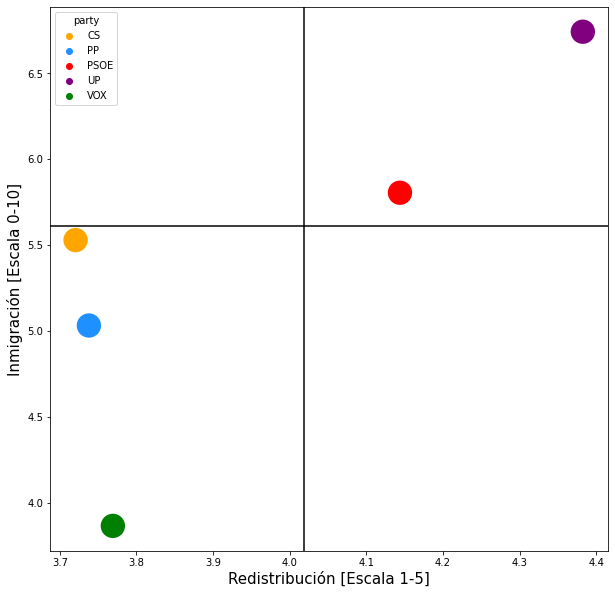

In [91]:
plt.figure(figsize=(10, 10))
plt.axhline(y=df_1["imwbcnt"].mean(), color = "black")
plt.axvline(x=df_1["gincdif"].mean(), color = "black")
plt.xlabel("Redistribución [Escala 1-5]", fontsize=15)
plt.ylabel("Inmigración [Escala 0-10]", fontsize=15)
sns.scatterplot(data=means, x="gincdif", y="imwbcnt", hue="party", s=700, 
                palette=["orange", "dodgerblue", "red", "purple", "green"])